# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# librería para dividir conjunto de entrenamiento y test mediante cross validation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [5]:
print('El árbol de regresión tiene:\n a.',(len(X_train)),'instancias en conjunto de entrenamiento',
     '\n b.',(len(y_test)),'instancias en conjunto de testeo')

El árbol de regresión tiene:
 a. 5100 instancias en conjunto de entrenamiento 
 b. 1276 instancias en conjunto de testeo


In [6]:
# profundidad del arbol:
print("El modelo tiene una profundidad de:{0: }".format(tree_reg.tree_.max_depth), 'nodos')

El modelo tiene una profundidad de: 25 nodos


Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [7]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [22]:
# En esta celda calculá el rmse
rmse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error: ', format(np.sqrt(rmse),'.3f'))

Root Mean Squared Error:  21391.596


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
# Ajuste del árbol de decisión
rmses_train = []
rmses_test = []

for i in range(1,7):
    tree_reg = DecisionTreeRegressor(random_state=0, max_depth=i*5)
    tree_reg.fit(X_train, y_train)
    
    y_pred = tree_reg.predict(X_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred_test = tree_reg.predict(X_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

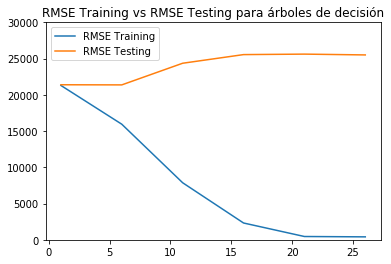

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [12]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
knn_train = KNeighborsRegressor(n_neighbors=7, weights='uniform', algorithm='brute')
knn_train.fit(X_train, y_train) 
y_pred = knn_train.predict(X_test)

In [13]:
knn_mse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error para KNN: ', format(np.sqrt(knn_mse), '.3f'))

Root Mean Squared Error para KNN:  22393.787


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [14]:
# Calculá los cambio en el rmse en esta celda
rmses_train = []
rmses_test = []

for i in range(1,30):
    knn_train = KNeighborsRegressor(n_neighbors=i)
    knn_train.fit(X_train, y_train) 
    y_pred_train = knn_train.predict(X_train)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))  
    y_pred = knn_train.predict(X_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

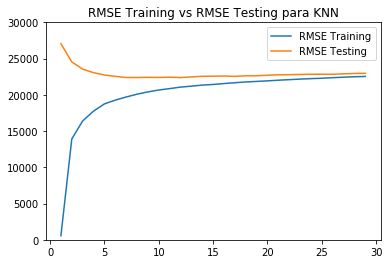

In [15]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [16]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error: ', format(np.sqrt(mse), '.3f'))

Root Mean Squared Error:  21391.596


In [17]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [18]:
# Calculá en esta celda los cross_val_score
scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = []
for score in scores:
    rmse = nmsq2rmse(score)
    rmse_scores.append(rmse)
    print('Root Mean Squared Error: ', format(rmse, '.4f'))

Root Mean Squared Error:  22920.8455
Root Mean Squared Error:  23031.6463
Root Mean Squared Error:  23685.8582
Root Mean Squared Error:  22792.0042
Root Mean Squared Error:  22509.4410
Root Mean Squared Error:  22158.5373
Root Mean Squared Error:  21815.9871
Root Mean Squared Error:  21930.9383
Root Mean Squared Error:  20540.1891
Root Mean Squared Error:  22018.8940


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [19]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [20]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [21]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,138000.000,117376.605,20623.395
1,75000.000,117030.343,42030.343
2,95000.000,115175.879,20175.879
3,118000.000,117376.605,623.395
4,95000.000,100430.730,5430.730
5,93000.000,100583.546,7583.546
6,170000.000,146558.218,23441.782
7,160000.000,150440.478,9559.522
8,75000.000,85206.795,10206.795
9,141999.000,150440.478,8441.478
